In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [21]:
import cupy as cp

In [22]:
PROJECT_PATH = '../'
REDM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_RedM_R5000.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [23]:
with h5py.File(REDM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [24]:
flux0.shape, wave0.shape

((116614, 2204), (2204,))

In [25]:
from lv.base.dataloader_c import DataLoader

In [83]:
ds = DataLoader()

In [84]:
ds.prepare_data ("RedM", "B", flux0, wave0, para0, fix_CO=0)

Cupy flux: 3300, wave: 2204


# find mask

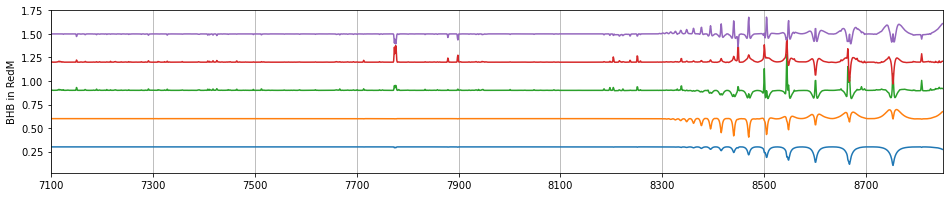

In [85]:
ds.init_pcp()

In [102]:
# k,q,prom = 10, 0.75, 0.1
k,q,prom = 2, 0.8, 0.005
peaks, prop, nvv= ds.get_peaks(k=k,q=q,prom=prom)

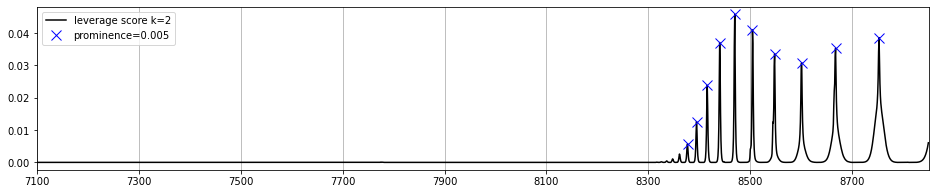

In [103]:
ds.plot_peaks(nvv, peaks, k, prom)

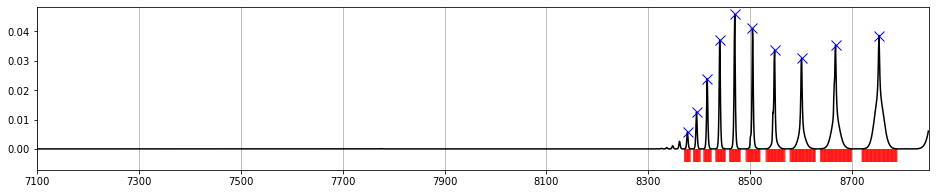

In [104]:
ds.plot_mask_from_peaks(peaks, prop, nvv)

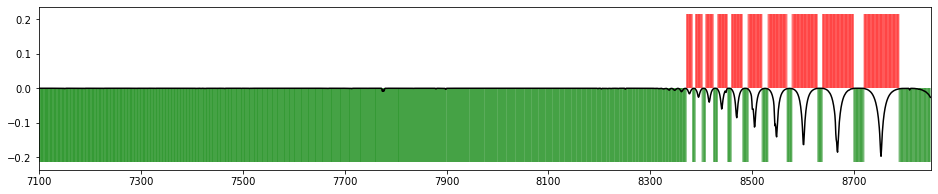

In [106]:
ds.plot_MN_mask(0)

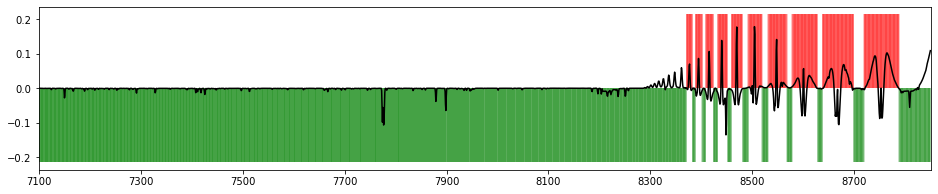

In [107]:
ds.plot_MN_mask(4)

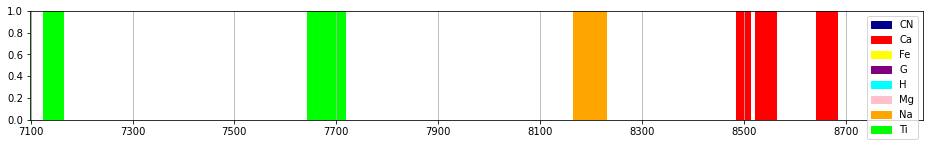

In [108]:
ds.plot_lick()

In [134]:
ds.get_MN(ds.nmask, top=5)

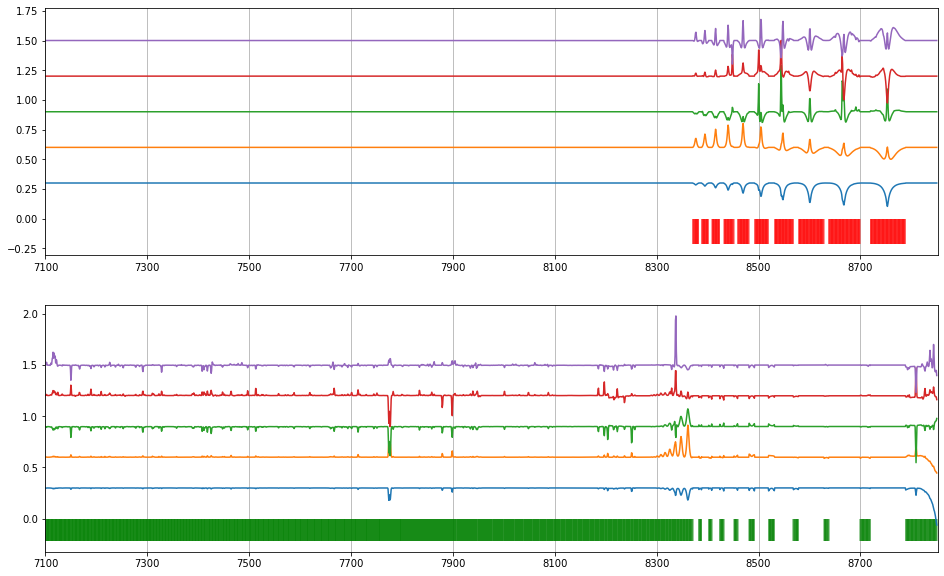

In [136]:
ds.plot_MN(step=0.3)

In [373]:
mu = 1.0 / ds.Mw[2]
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-5, mu=mu, lam=None, norm=None, maxiter=1000)

mu 0.12, lambda 0.0174, norm 24849.3


L(32, 380), S(30, 380)


(32, 2204)


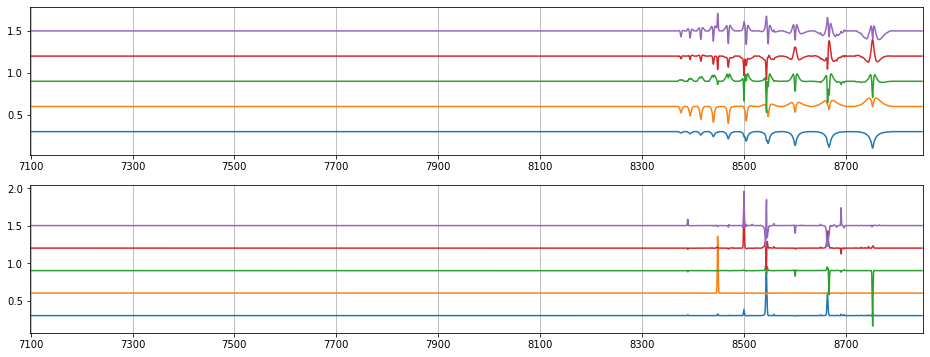

In [374]:
nMLv, nMSv =ds.eval_pcp(MLv, MSv)

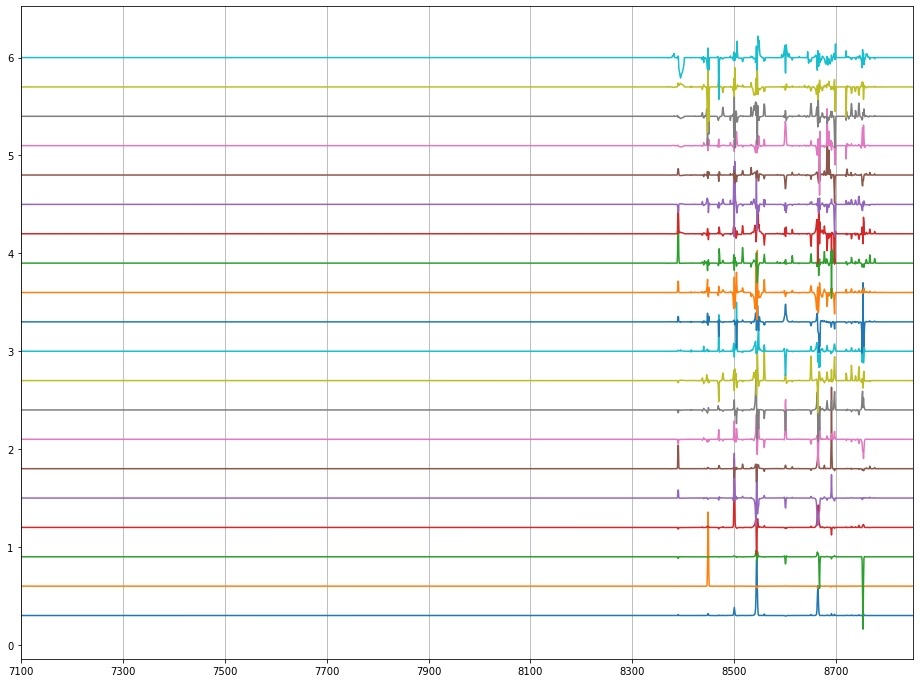

In [375]:
ds.plot_V(nMSv, top=20)

In [416]:
mu = 1.0 / ds.Nw[5]
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=mu, lam=None, norm=None, maxiter=100)

mu 2.25, lambda 0.0174, norm 155.4


L(49, 1824), S(30, 1824)


(49, 2204)


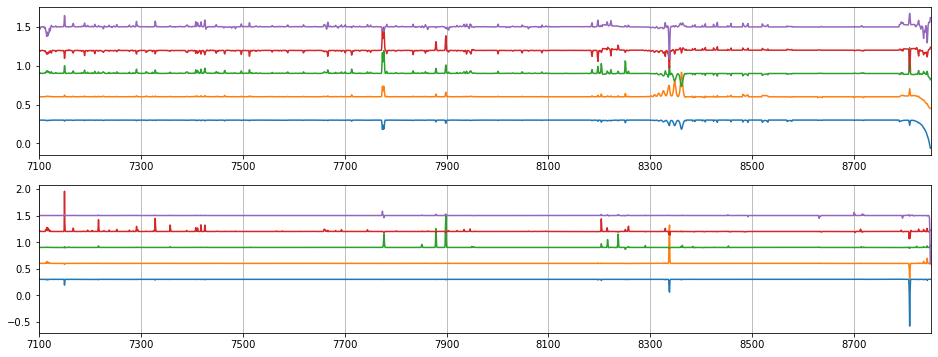

In [417]:
nNLv, nNSv = ds.eval_pcp(NLv, NSv, isM=0)

In [457]:
ds.pcp_transform(MLv, MSv, NLv, NSv, top=15)

In [458]:
ds.pcp_np()

In [467]:
rf = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=50, max_features=5)

In [468]:
idx=1
rf.fit(ds.npcpFlux, ds.para[:,idx])

RandomForestRegressor(max_depth=20, max_features=5, n_estimators=50,
                      random_state=0)

<BarContainer object of 20 artists>

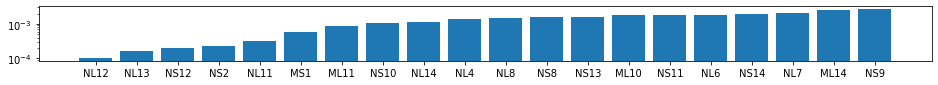

In [469]:
sdx = rf.feature_importances_.argsort()[:20]
plt.figure(figsize=(16,1))
plt.bar([name[sdx[i]] for i in range(len(sdx))], rf.feature_importances_[sdx], log=1)

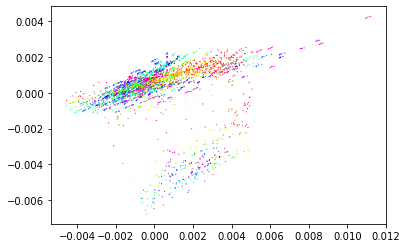

In [470]:
ds.prf(sdx[0], sdx[1], "T")

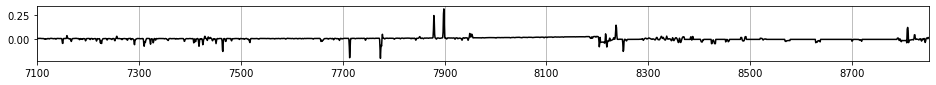

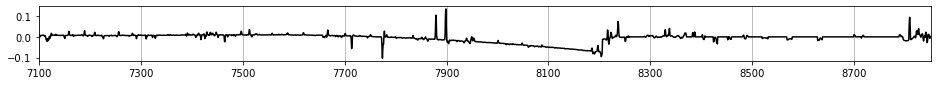

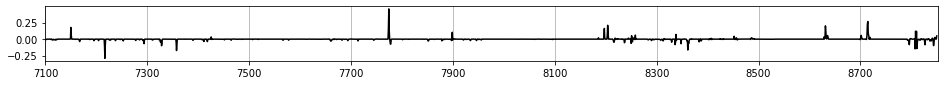

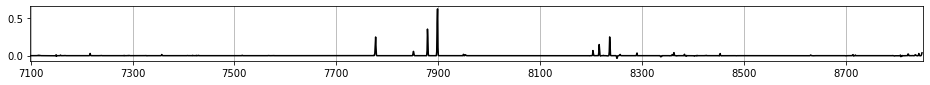

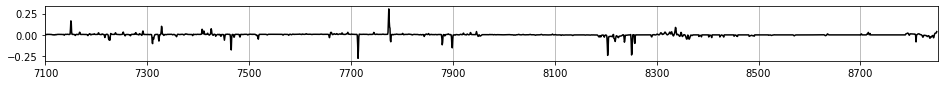

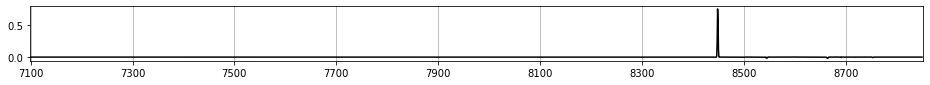

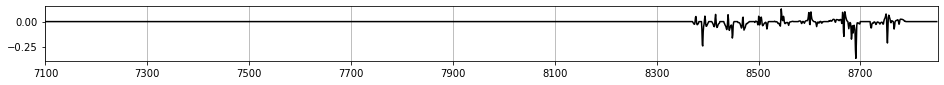

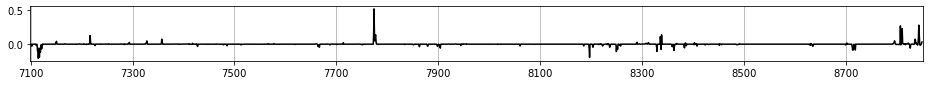

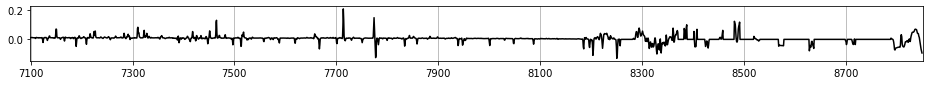

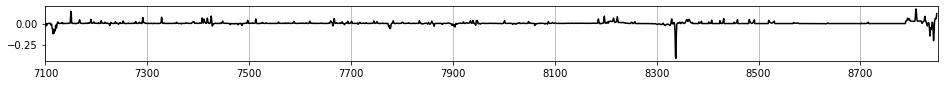

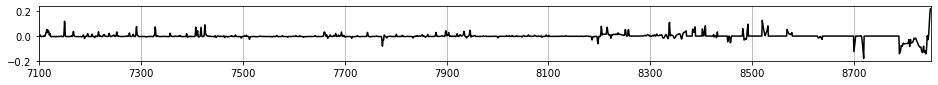

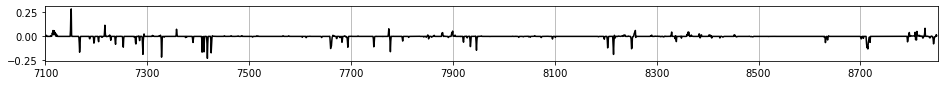

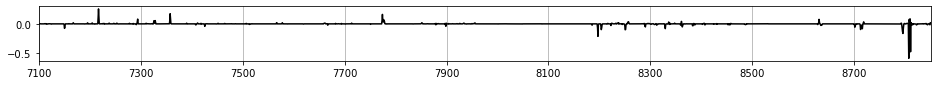

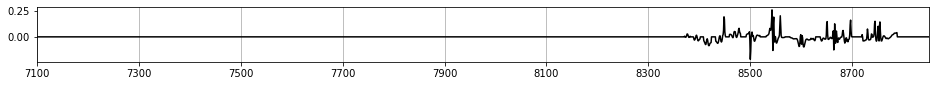

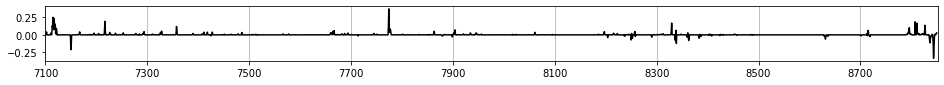

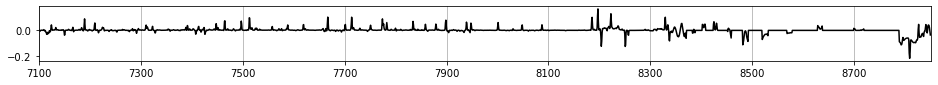

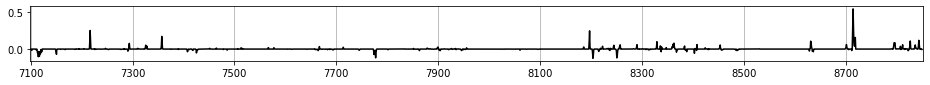

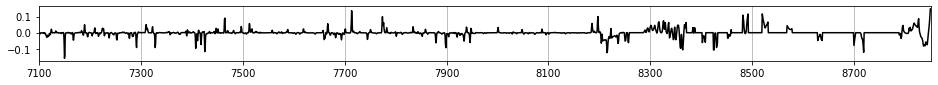

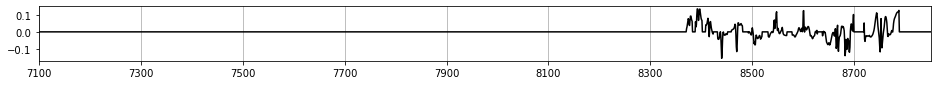

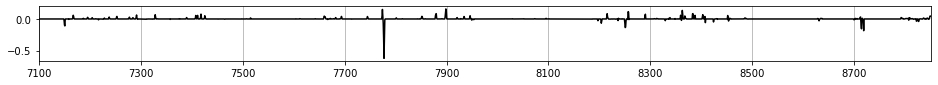

In [471]:
for i in range(20):
    ds.plot_nv(ds.nXv, sdx[i])

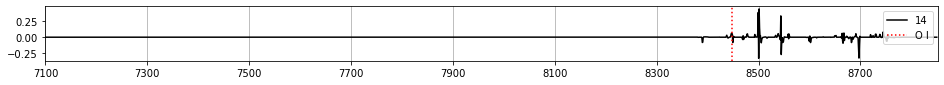

In [412]:
ds.plot_nv(nMSv, 14)
ds.plot_O(8800)

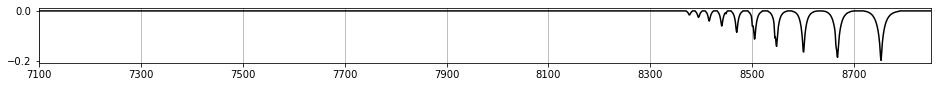

In [401]:
ds.plot_nv(nMLv, 0)

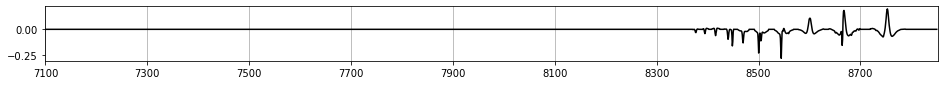

In [402]:
ds.plot_nv(nMLv, 3)

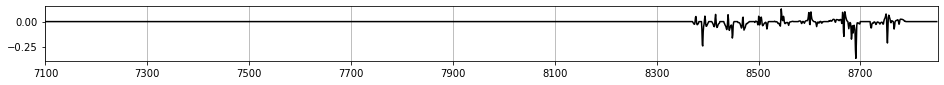

In [400]:
ds.plot_nv(nMLv, 11)
# ds.plot_O(8800)

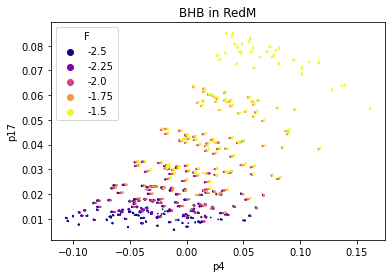

In [347]:
ds.p(4,17,"F",large=0)

In [328]:
rf.

{'RF_type': 1,
 'handle': <cuml.raft.common.handle.Handle at 0x7f300d7bd670>,
 'verbose': 4,
 'output_type': 'cudf',
 '_input_type': 'cupy',
 'target_dtype': None,
 'n_features_in_': 30,
 'split_criterion': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_impurity_decrease': 0.0,
 'max_samples': 1.0,
 'max_leaves': -1,
 'n_estimators': 5,
 'max_depth': 10,
 'max_features': 10,
 'bootstrap': True,
 'n_bins': 128,
 'n_cols': 30,
 'dtype': dtype('float32'),
 'accuracy_metric': 'r2',
 'max_batch_size': 4096,
 'n_streams': 4,
 'random_state': None,
 'rf_forest': 94861785685632,
 'rf_forest64': 94860668560112,
 'model_pbuf_bytes': bytearray(b''),
 'treelite_handle': None,
 'treelite_serialized_model': None,
 'n_rows': 3300}

In [315]:
pcpM = cp.asarray(pcpM, dtype=cp.float32)

In [317]:
cp.dtype(pcpM)

dtype('float32')

In [319]:
cp.dtype(ds.para[:,0])

dtype('float16')

In [329]:
rf.score(pcpM, ds.para[:,0])

0.952106237411499

In [330]:
rf.__dict__

{'RF_type': 1,
 'handle': <cuml.raft.common.handle.Handle at 0x7f300d7bd670>,
 'verbose': 4,
 'output_type': 'cudf',
 '_input_type': 'cupy',
 'target_dtype': None,
 'n_features_in_': 30,
 'split_criterion': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_impurity_decrease': 0.0,
 'max_samples': 1.0,
 'max_leaves': -1,
 'n_estimators': 5,
 'max_depth': 10,
 'max_features': 10,
 'bootstrap': True,
 'n_bins': 128,
 'n_cols': 30,
 'dtype': dtype('float32'),
 'accuracy_metric': 'r2',
 'max_batch_size': 4096,
 'n_streams': 4,
 'random_state': None,
 'rf_forest': 94861785685632,
 'rf_forest64': 94860668560112,
 'model_pbuf_bytes': bytearray(b''),
 'treelite_handle': 94861807699664,
 'treelite_serialized_model': None,
 'n_rows': 3300}

In [331]:
rf.feature_importances_

AttributeError: 

In [290]:
para = ds.dfpara[["F","T","L","C","O"]].values

In [293]:
para = np.array(para, dtype=np.float32)

In [296]:
pcpM.shape

(3300, 30)

In [299]:
pcpMn = np.array(pcpM, dtype=np.float32)

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [300]:
rf.score(pcpM, para[:,0])

TypeError: GPU based predict only accepts np.float32 data.                             In order use the GPU predict the model should                             also be trained using a np.float32 dataset.                             If you would like to use np.float64 dtype                             then please use the CPU based predict by                             setting predict_model = 'CPU'

In [262]:
pcpM.shape

(3300, 30)

In [240]:
 MLv.shape

(46, 380)

In [243]:
pcpM = cp.dot(ds.M, MLv.T)

In [244]:
pcpM.shape

(3300, 46)

In [245]:
ML.shape

(3300, 380)

In [ ]:
pcpN = 

In [239]:
MSv.shape

(5, 380)

In [ ]:
rf.fit(MSv, Y)

In [ ]:
# from cuml.test.utils import get_handle
X = np.asarray([[0,10],[0,20],[0,30],[0,40]], dtype=np.float32)
y = np.asarray([0.0,1.0,2.0,3.0], dtype=np.float32)
cuml_model = curfc(max_features=1.0, n_bins=128,
                    min_samples_leaf=1,
                    min_samples_split=2,
                    n_estimators=40, accuracy_metric='r2')
cuml_model.fit(X,y)
cuml_score = cuml_model.score(X,y)
print("MSE score of cuml : ", cuml_score)

In [238]:
with h5py.File(TRAIN_PATH, 'w') as f:
    f.create_dataset('flux', data = flux_t20, shape=flux_t20.shape)
    f.create_dataset('PCP_PATH', data = TRAIN_PATH2)
    f.create_dataset('para', data = para_t, shape=para_t.shape)
    f.create_dataset('pcp', data = pcp20n, shape=pcp20n.shape)
    

In [216]:
from matplotlib import cm

In [218]:
para_t[:,1].shape

(100000,)

Text(0.5, 1.0, 'BlueHB in RedM R=5000 from RBF')

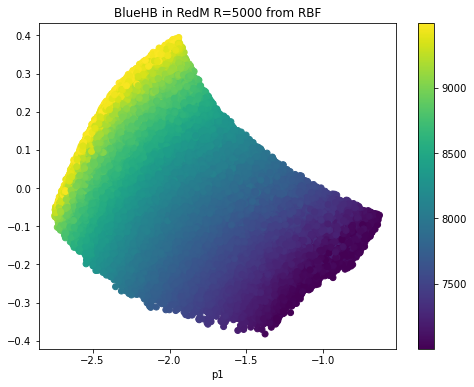

In [225]:
plt.figure(figsize=(8,6), facecolor="w")
plt.scatter(flux_t20[:,0], flux_t20[:,1], c =para_t[:,1] )
plt.colorbar()
plt.xlabel("p0")
plt.xlabel("p1")
plt.title("BlueHB in RedM R=5000 from RBF")

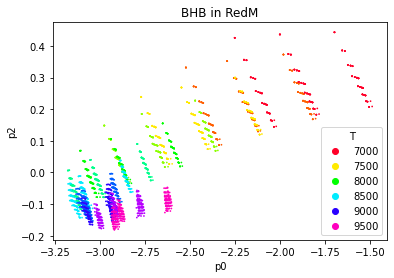

In [167]:
ds.p(0,2,"T",large=0)

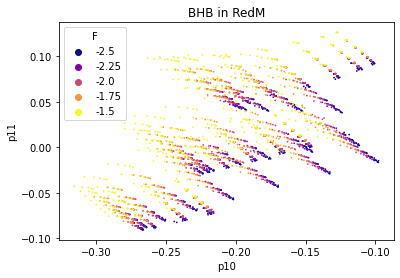

In [163]:
ds.p(10,11,"F")

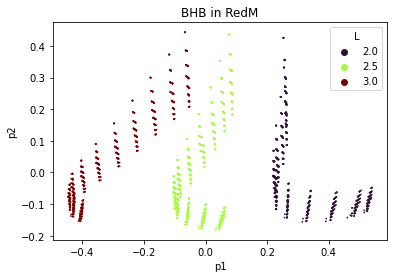

In [164]:
ds.p(1,2,"L")

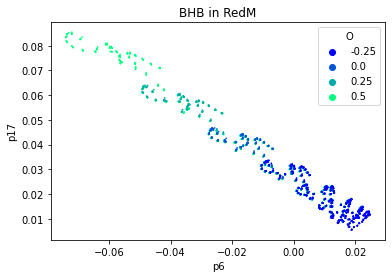

In [169]:
ds.p(6,17,"O")

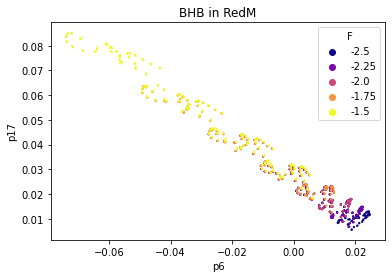

In [170]:
ds.p(6,17,"F")

In [171]:
ds.pcp20.shape

(20, 2204)

In [394]:
8800//1000

8

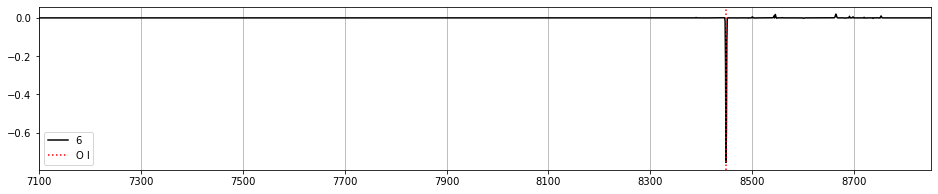

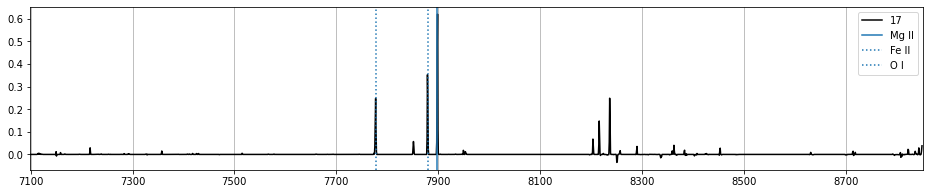

In [231]:
ds.plot_nv(ds.pcp20, 6)
plt.axvline(8448.57, c='r', linestyle = ":", label="O I")
# plt.xlim(8447, 8452)

plt.legend()
ds.plot_nv(ds.pcp20, 17)
plt.axvline(7898.64, c='r', linestyle = ":", label="Mg II")
plt.axvline(7879.14, c='r', linestyle = ":", label="Fe II")
plt.axvline(7777.53, c='r', linestyle = ":", label="O I")

# plt.xlim(7878, 7881)
plt.legend()


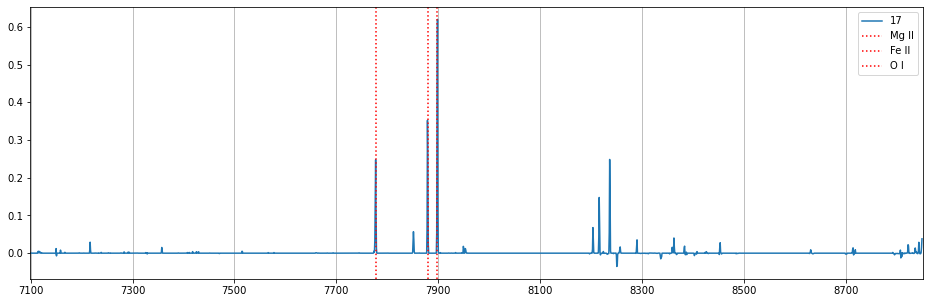

In [225]:
ds.plot_nv(ds.pcp20, 17,fineW=1)
plt.axvline(7898.64, c='r', linestyle = ":", label="Mg II")
plt.axvline(7879.14, c='r', linestyle = ":", label="Fe II")
plt.axvline(7777.53, c='r', linestyle = ":", label="O I")

# plt.xlim(7878, 7881)
plt.legend()


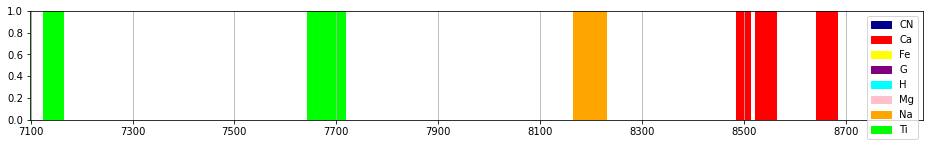

In [175]:
ds.plot_lick()

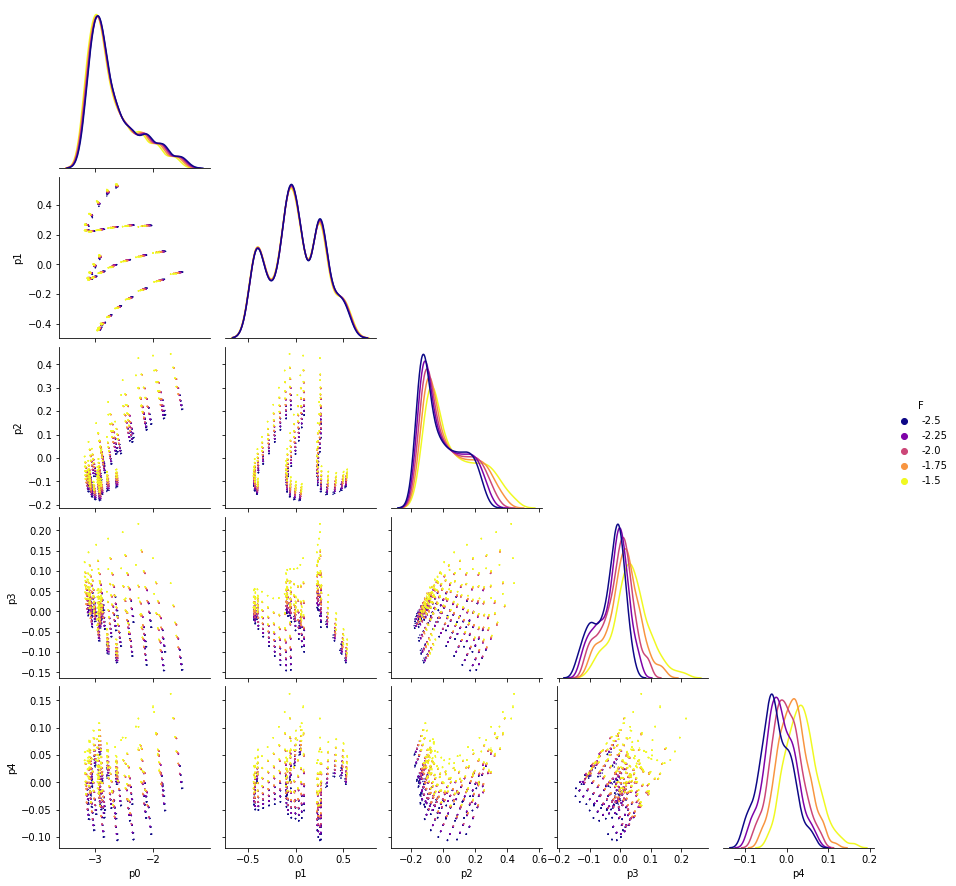

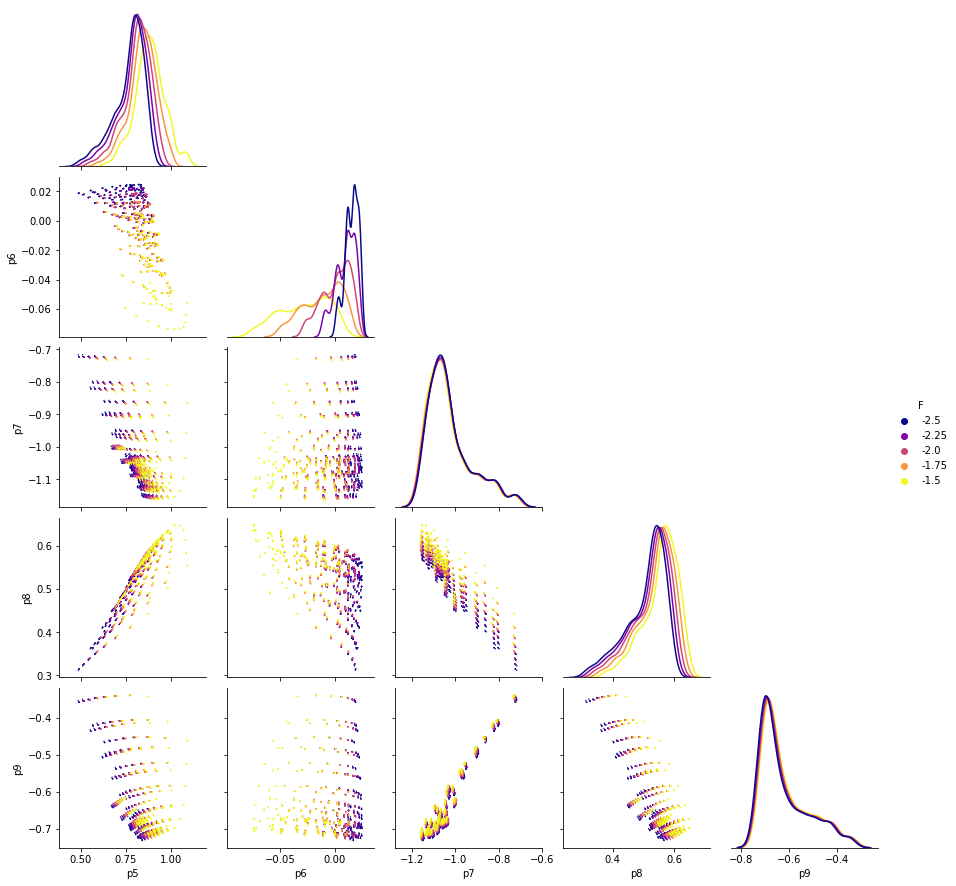

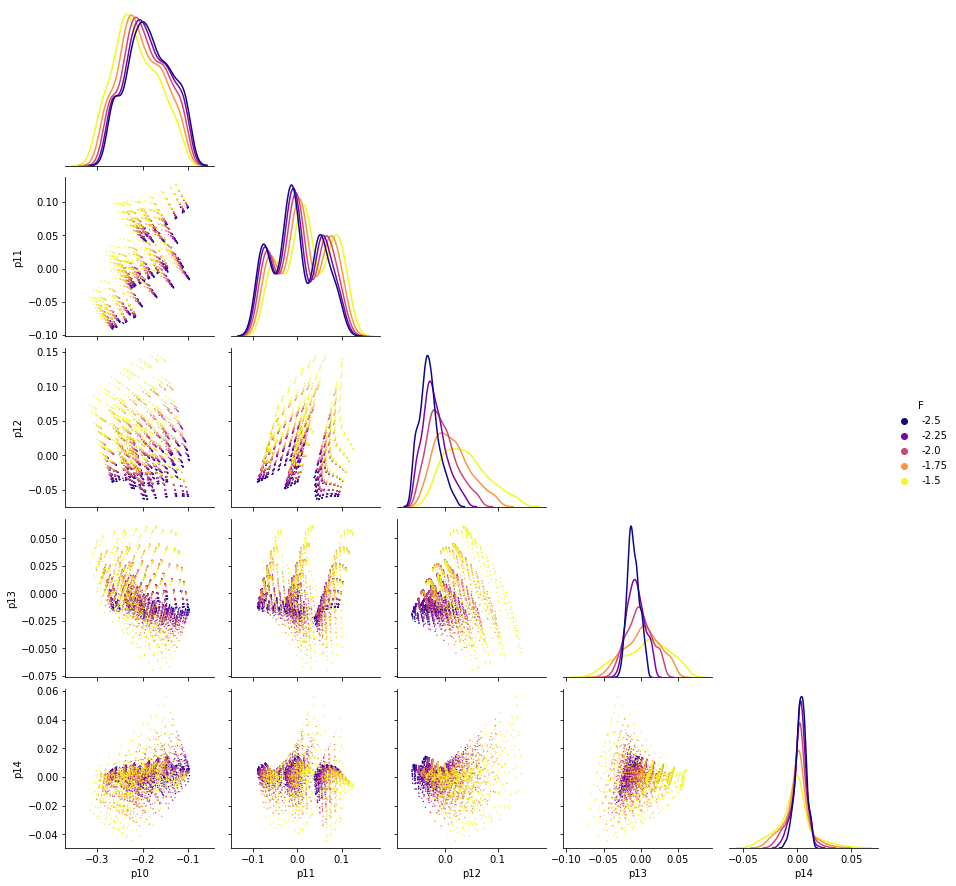

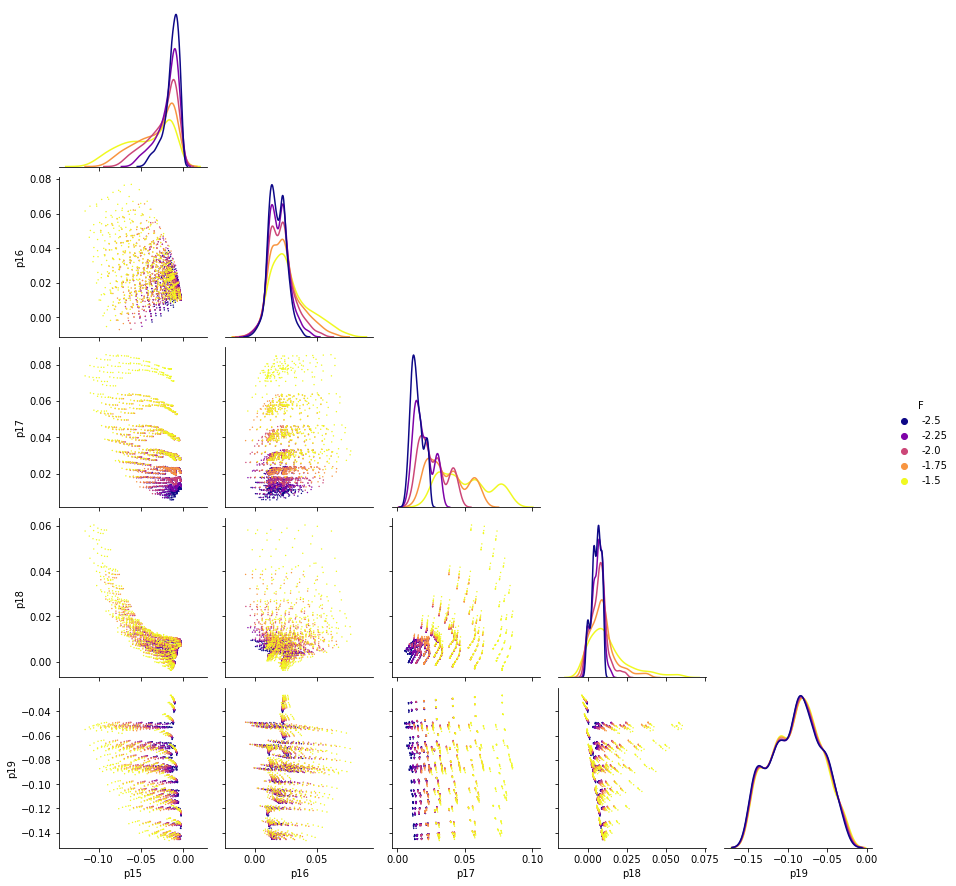

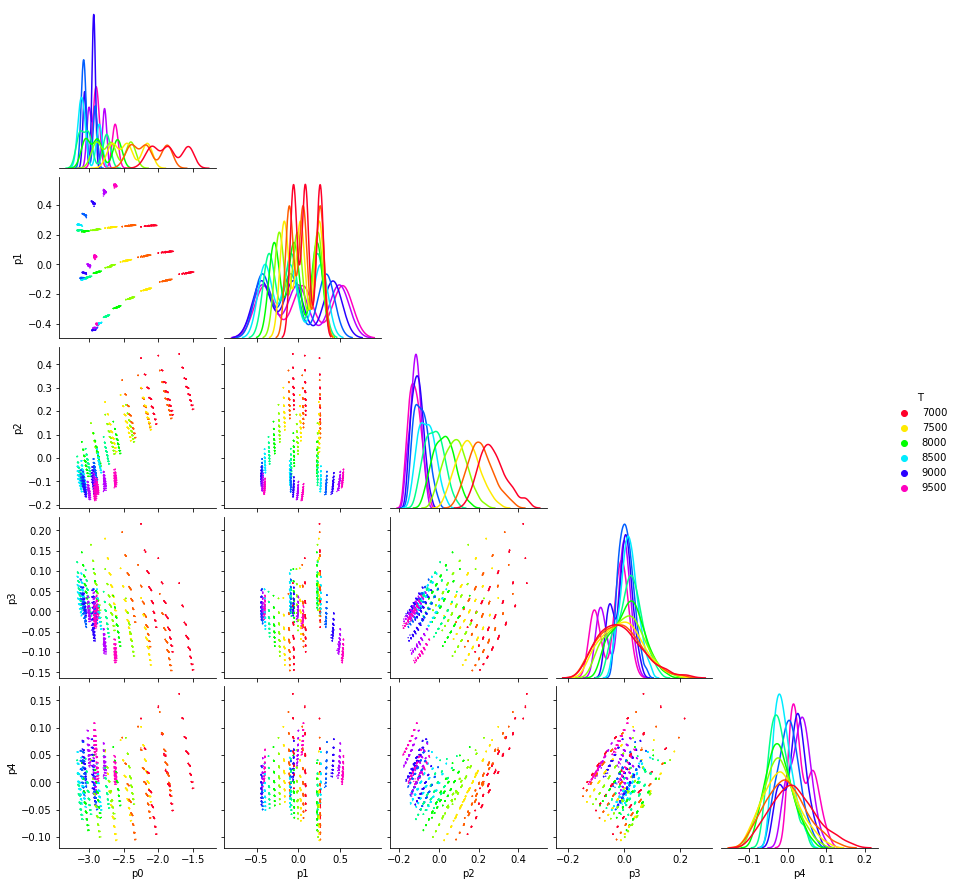

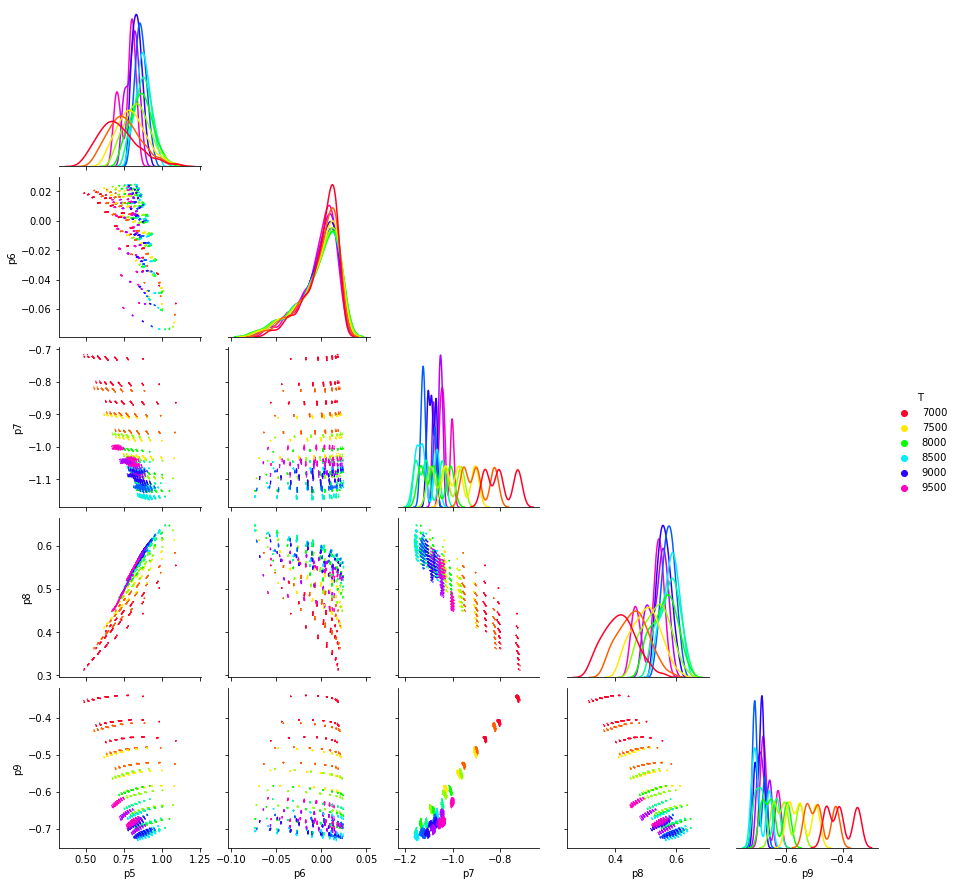

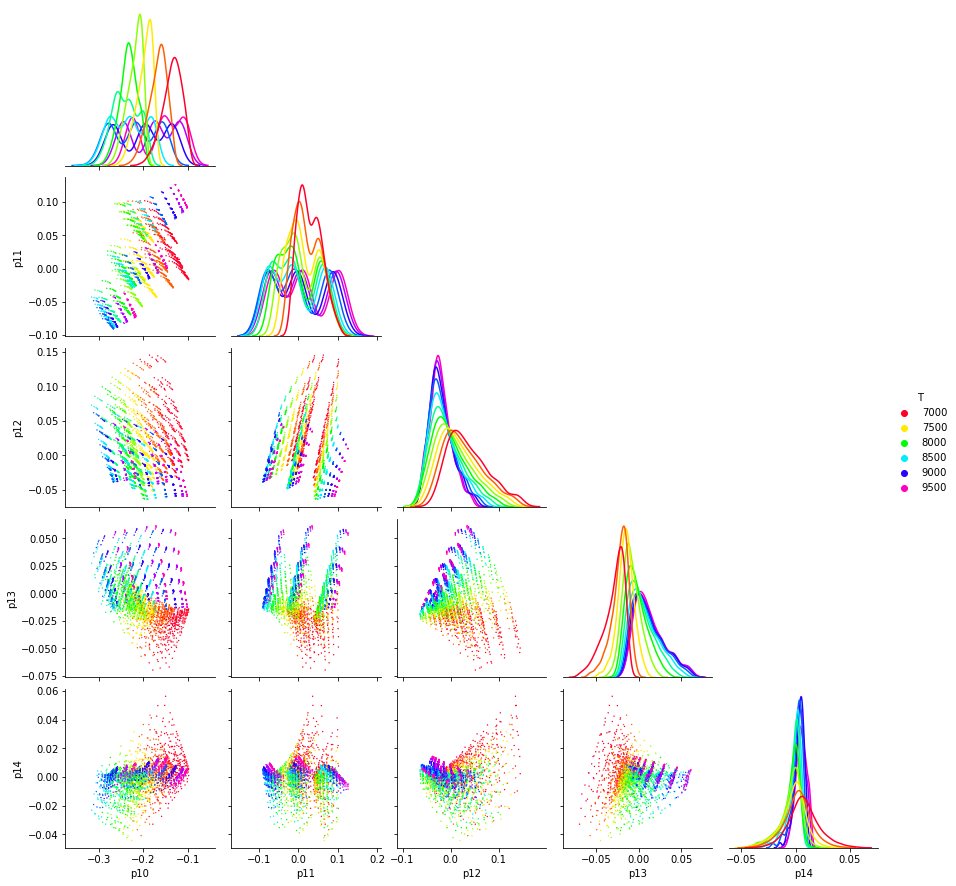

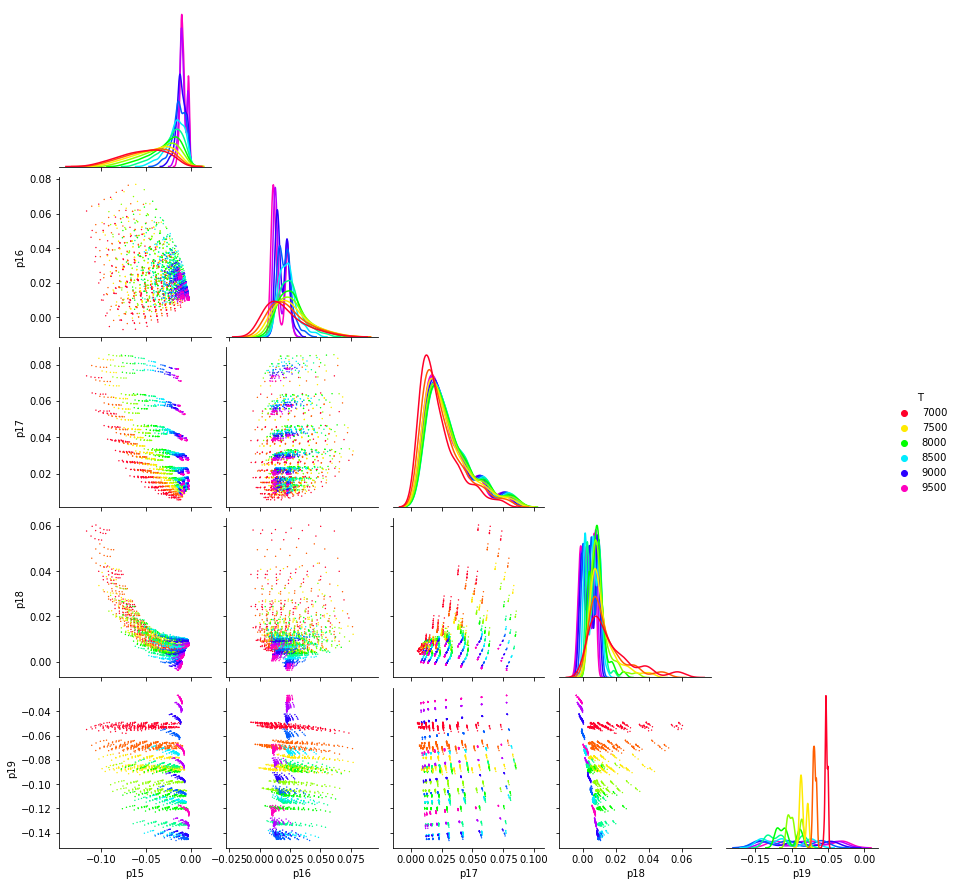

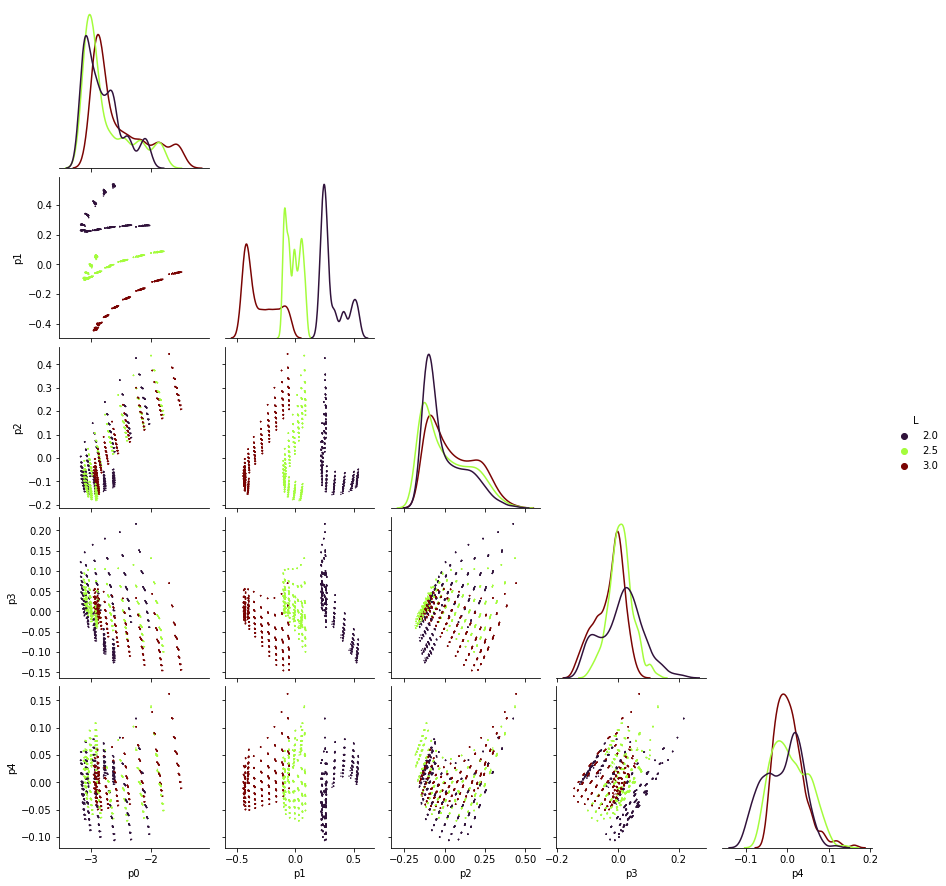

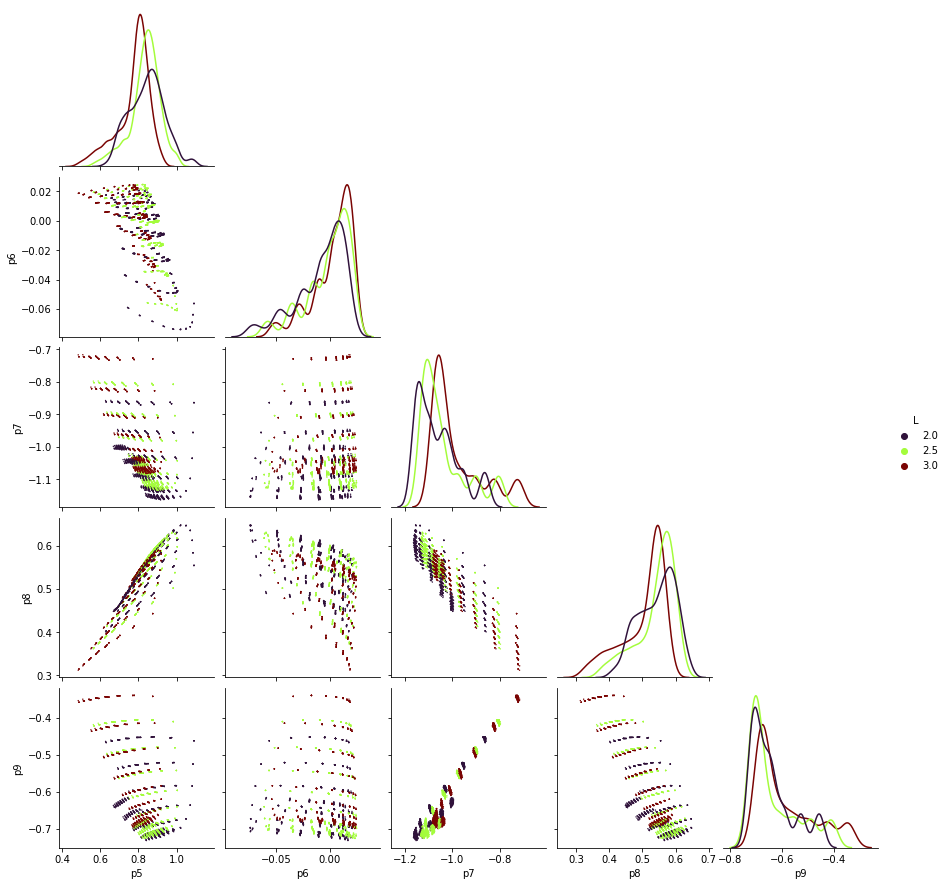

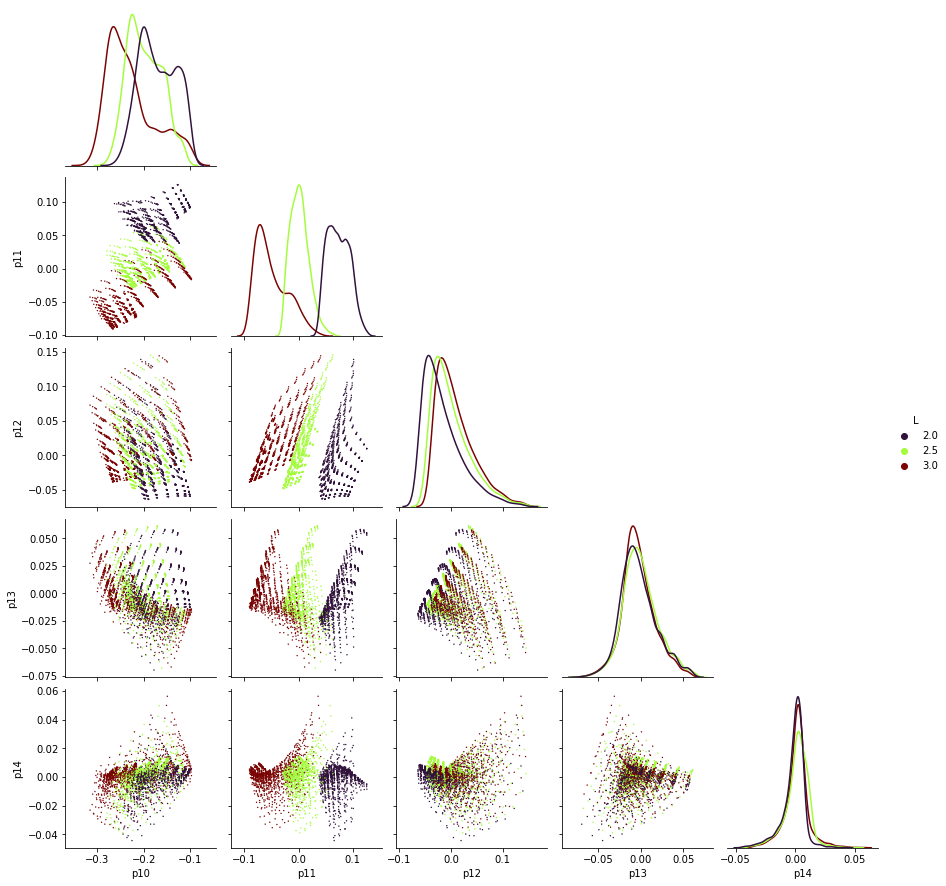

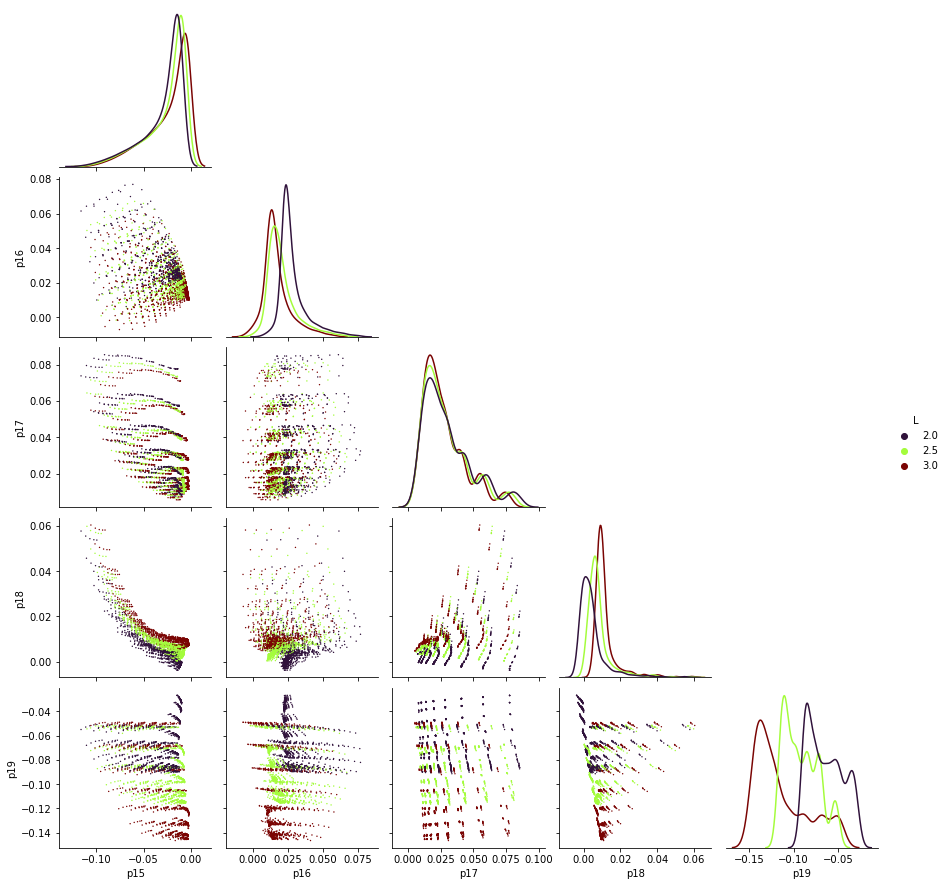

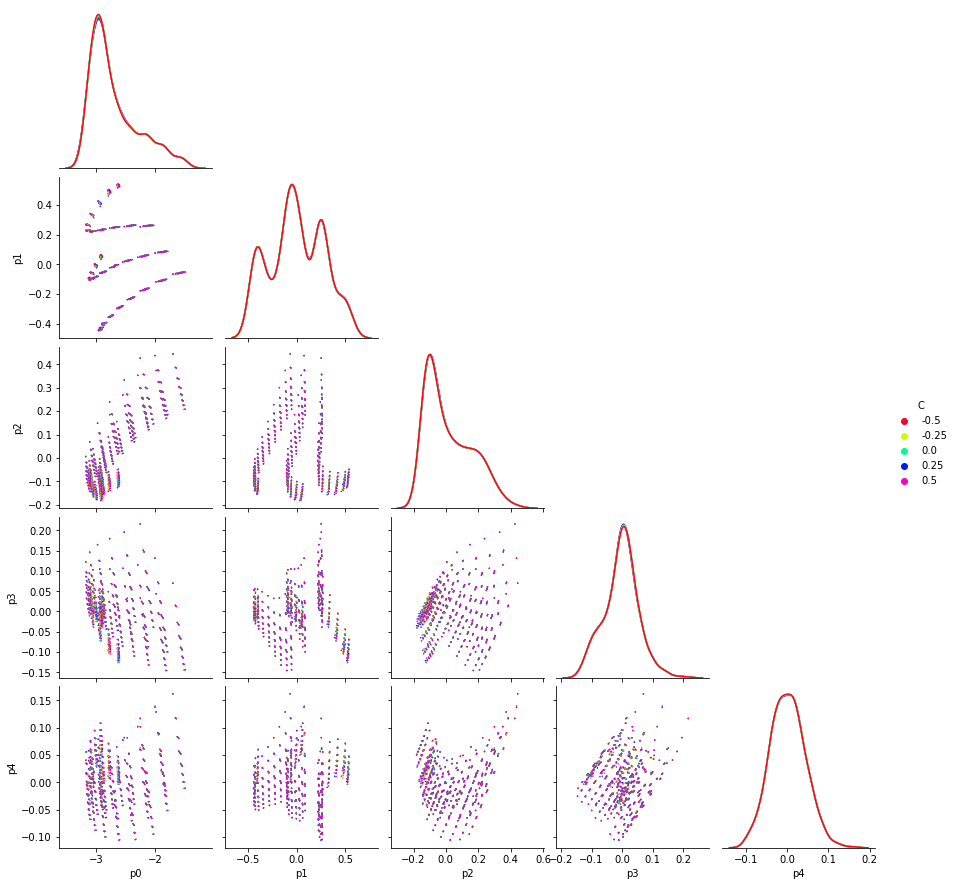

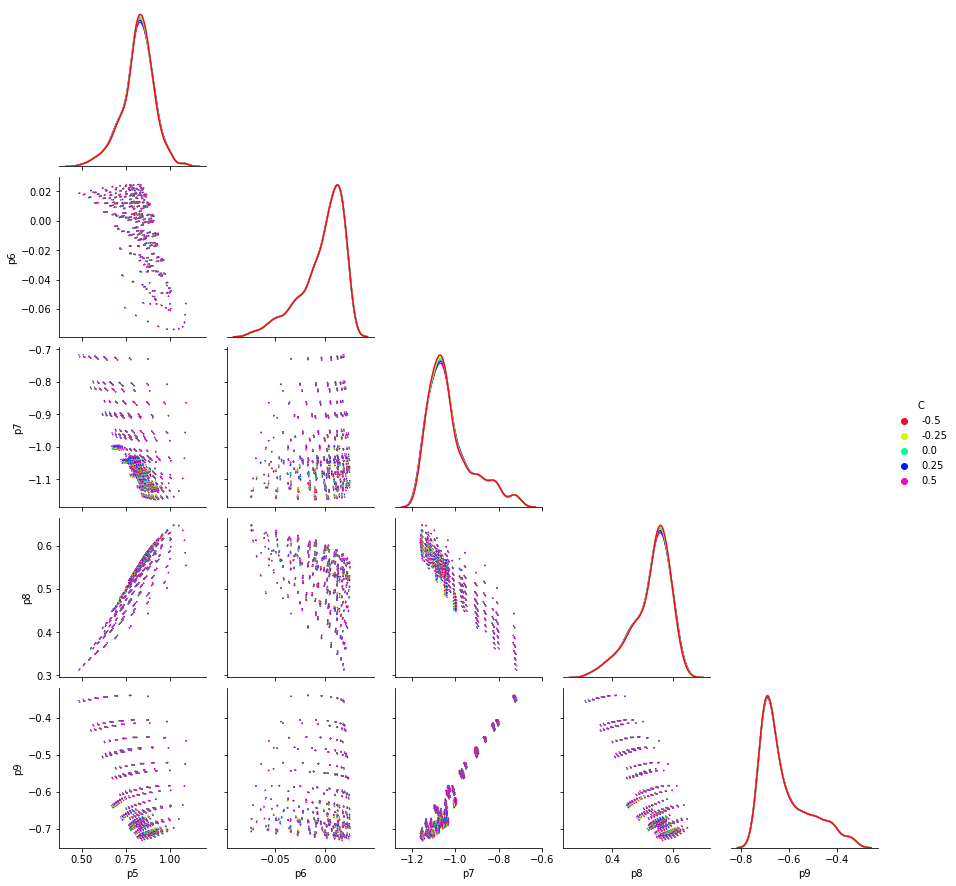

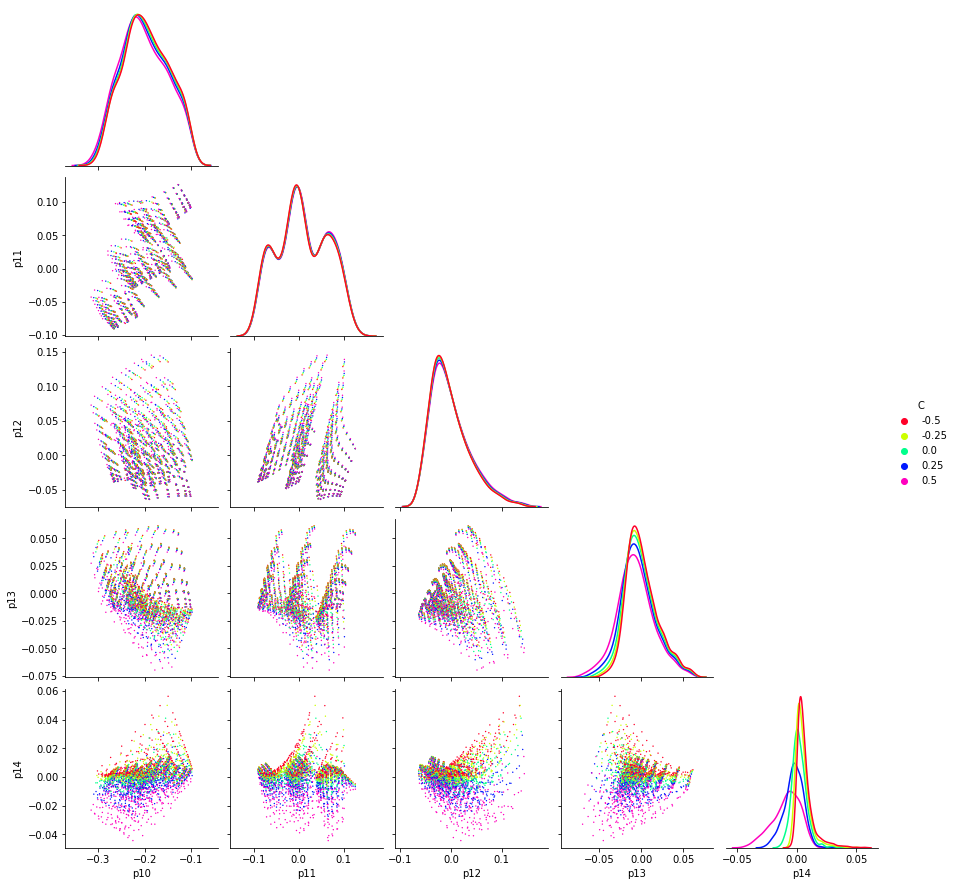

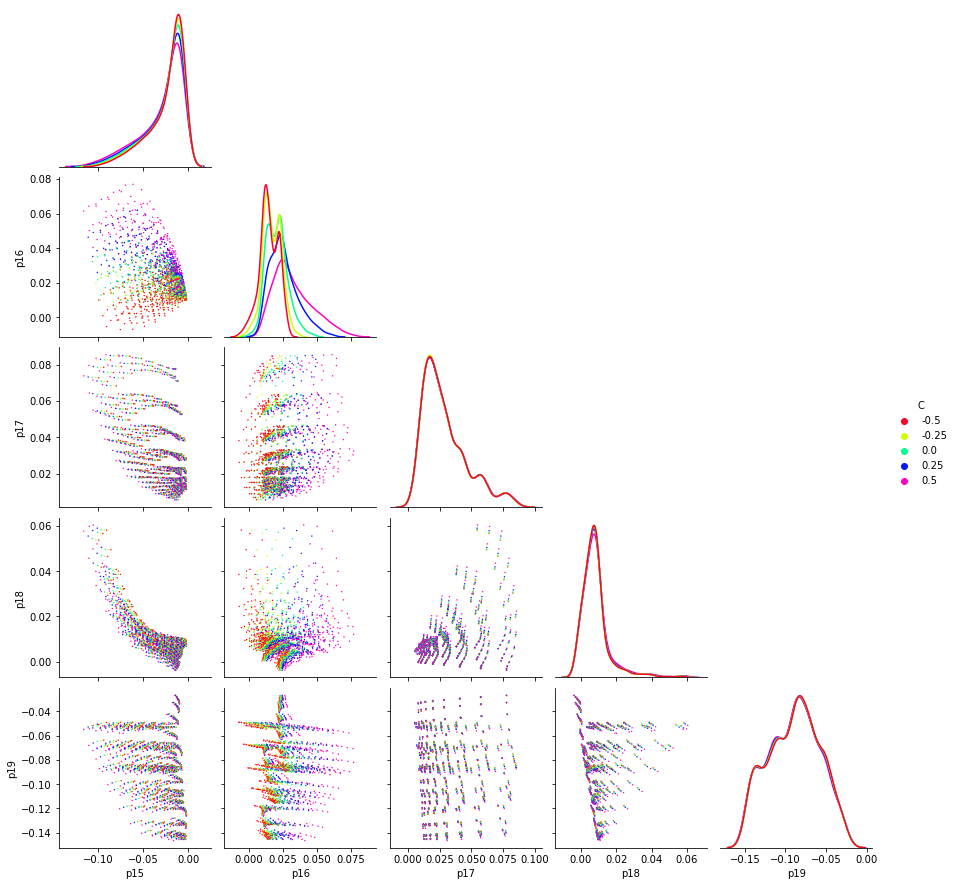

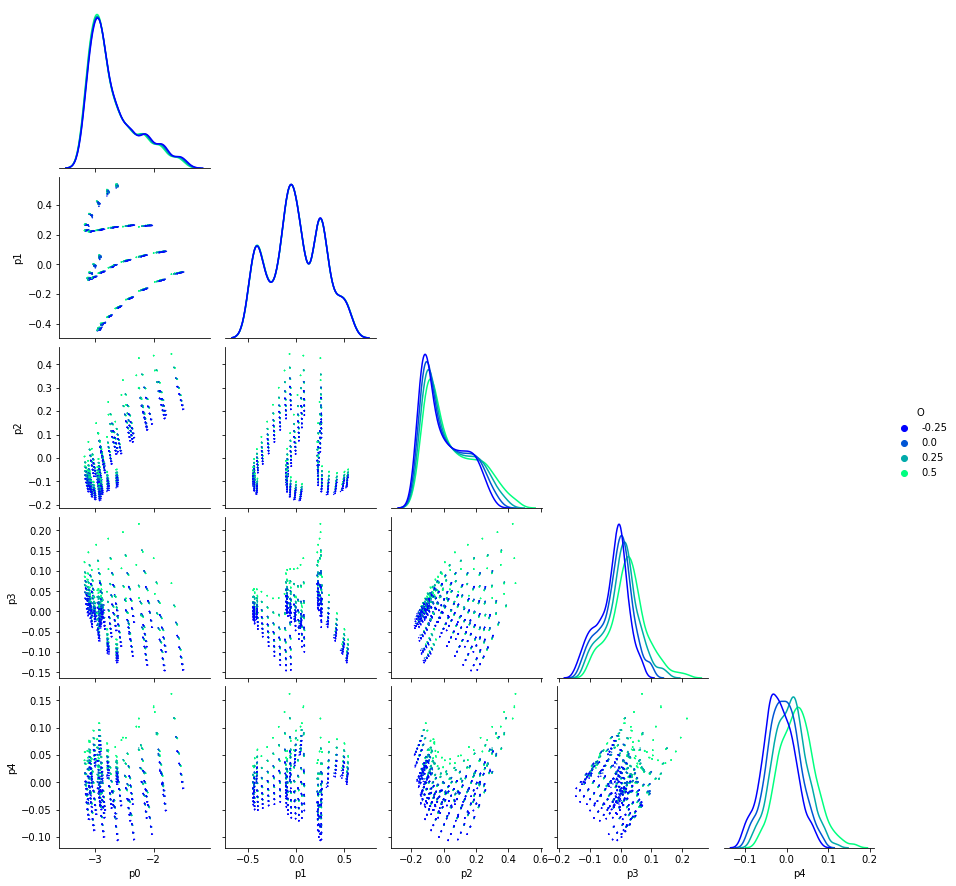

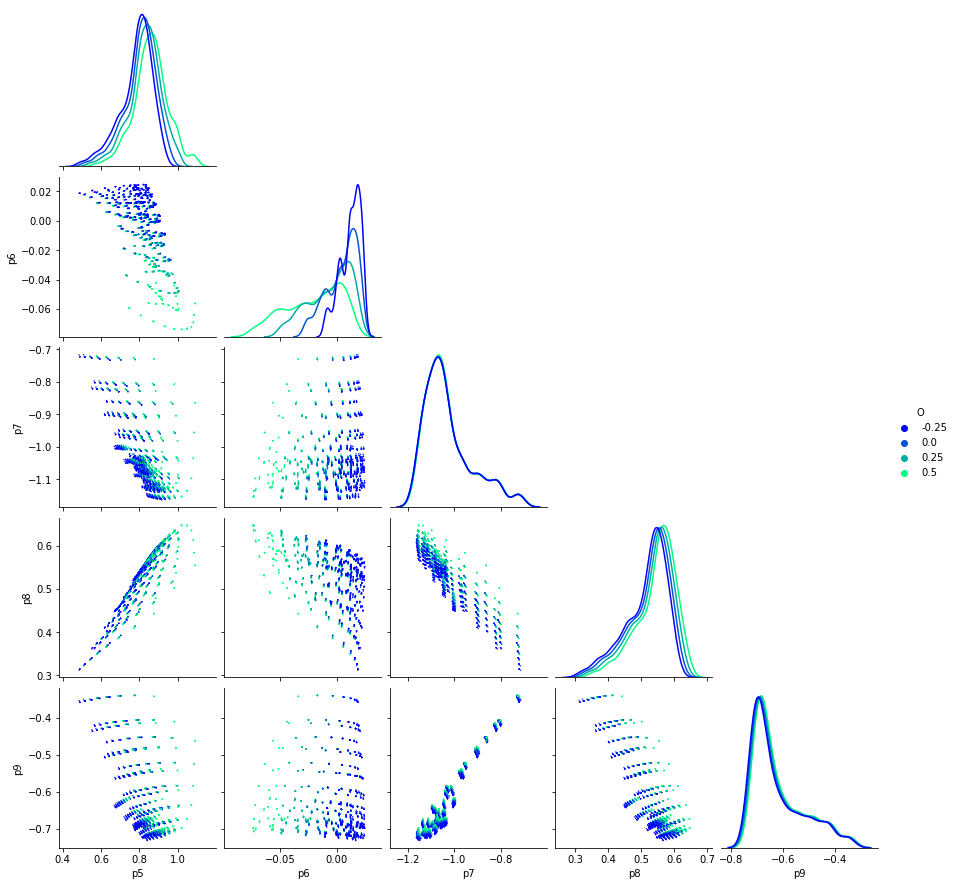

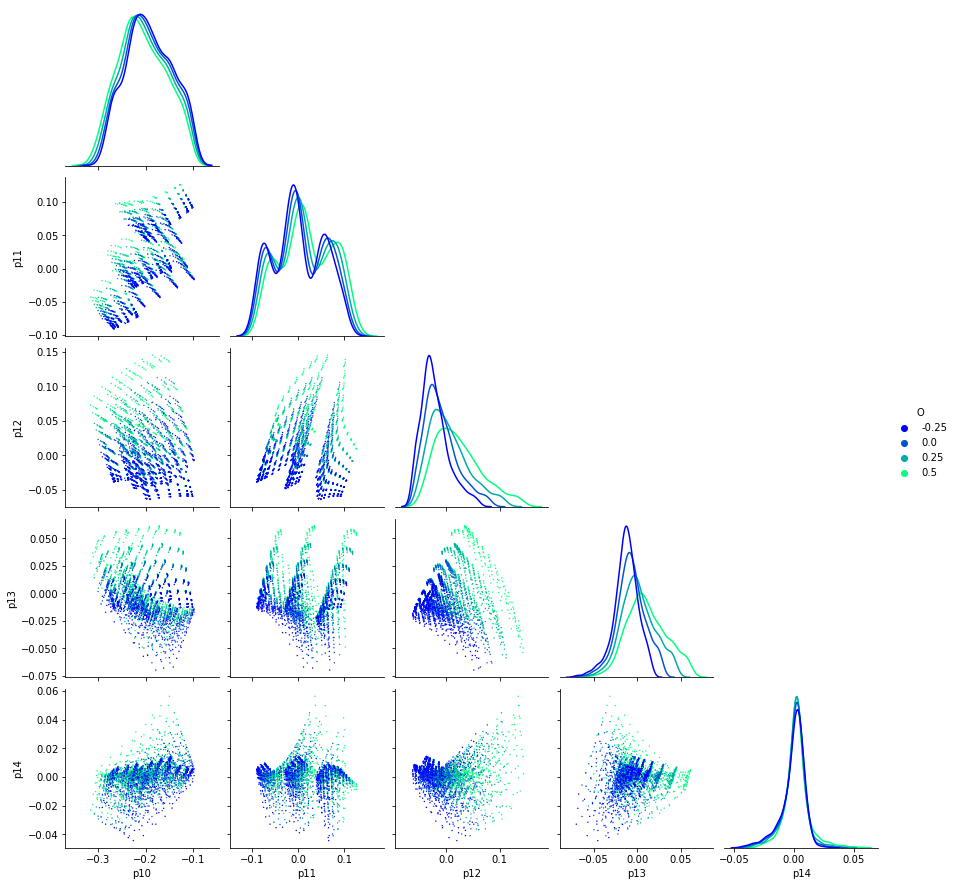

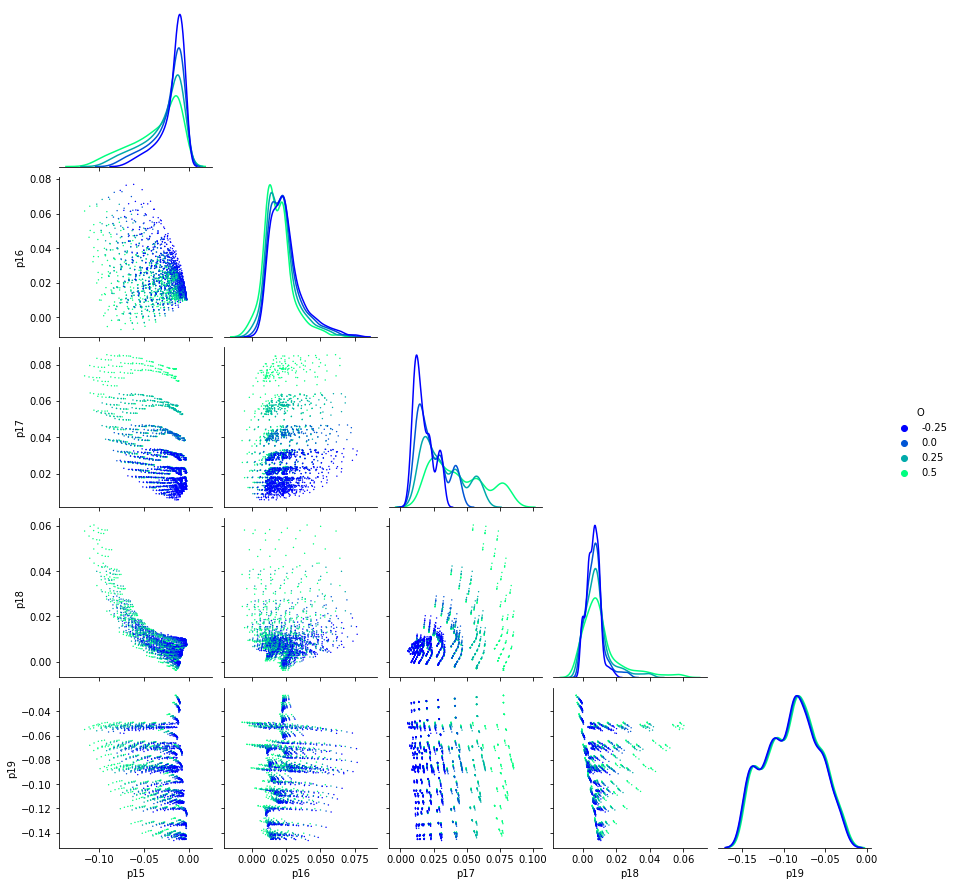

In [168]:
for p in ["F","T","L","C","O"]:
    for i in range(4):
        ds.pp(i, p)